# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

https://www.econometrics-with-r.org/4-1-simple-linear-regression.html

In [2]:
STR = np.array([15, 17, 19, 20, 22, 23.5, 25])
TestScore = np.array([680, 640, 670, 660, 630, 660, 635]) 

In [3]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

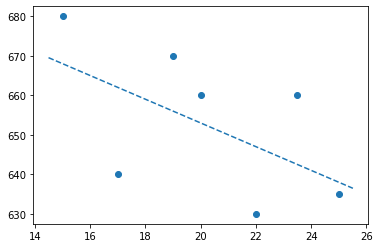

In [4]:
%matplotlib inline
plt.scatter(STR, TestScore)

abline(-3, 713)

plt.show()

![title](images/chapter4/img1.png)

# [Estimating the Coefficients of the Linear Regression Model](https://www.econometrics-with-r.org/4-2-estimating-the-coefficients-of-the-linear-regression-model.html)

In practice, the intercept β0 and slope β1 of the population regression line are unknown. Therefore, we must employ data to estimate both unknown parameters. In the following, a real world example will be used to demonstrate how this is achieved. We want to relate test scores to student-teacher ratios measured in Californian schools.

In [5]:
CAS = pd.read_csv('https://raw.githubusercontent.com/ejvanholm/DataProjects/master/CASchools.csv', index_col = 0)

In [6]:
CAS.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000
2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024
3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024
4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000
5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024


In [7]:
CAS['STR'] = CAS['students']/CAS['teachers']

In [8]:
CAS['score'] = (CAS['read'] + CAS['math'])/2  

In [9]:
CAS.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,STR,score
1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909,690.799988
2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664,661.200012
3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225,643.600006
4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143,647.700012
5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329,640.850006


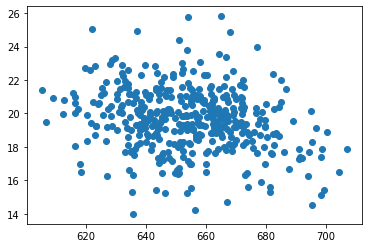

In [10]:
plt.scatter(CAS['score'], CAS['STR'])

In [11]:
np.corrcoef(CAS['score'], CAS['STR'])

array([[ 1.        , -0.22636275],
       [-0.22636275,  1.        ]])

In [12]:
linear_model_1 = smf.ols('score ~ STR', data = CAS).fit()

In [13]:
print(linear_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           2.78e-06
Time:                        21:49:43   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9329      9.467     73.825      0.0

In [14]:
linear_model_1.params

Intercept    698.932949
STR           -2.279808
dtype: float64

In Summary function (Bottom of source)  
https://github.com/statsmodels/statsmodels/blob/main/statsmodels/regression/linear_model.py    
https://github.com/statsmodels/statsmodels/blob/d7d21984afceaa5ef018c29bdfd9c6d69937b663/statsmodels/iolib/summary.py#L590

In [15]:
print(linear_model_1.bse)
print(linear_model_1.conf_int(0.05))

Intercept    9.467491
STR          0.479826
dtype: float64
                    0           1
Intercept  680.323124  717.542775
STR         -3.222980   -1.336636


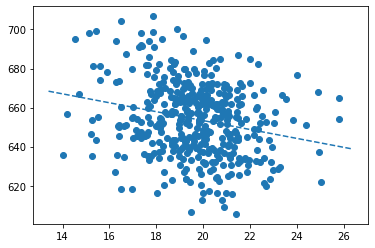

In [16]:
%matplotlib inline
plt.scatter(CAS['STR'], CAS['score'])

abline(linear_model_1.params[1], linear_model_1.params[0])

plt.show()

## The Coefficient of Determination

R squared.  
But be aware of outliers, they screw everything up.

## Simulation Study

In [17]:
N = 10000
X = stats.uniform(0, 20).rvs(N)
u = stats.norm(0, 10).rvs(N)

In [18]:
Y = -2 + (3.5 * X) + u

In [19]:
Y

array([50.9956422 , 53.36628606,  6.51430252, ..., 50.78869279,
        6.33919282, 59.64685329])

In [20]:
population = pd.DataFrame(columns = ['X', 'Y'],
                             data = np.column_stack((X, Y)))

In [21]:
population

,X,Y
0,13.837221,50.995642
1,11.857466,53.366286
2,2.083622,6.514303
3,2.237069,-10.327998
4,6.027065,46.658807
...,...,...
9995,0.031605,21.978600
9996,12.003199,52.361669
9997,14.874649,50.788693
9998,1.658648,6.339193


Calculate the mean and variance on n = 100

In [22]:
# set sample size
n = 100

# compute the variance of beta_hat_0
H_i = 1 - np.mean(X) / np.mean(X**2) * X
var_b0 = np.var(H_i * u) / (n * np.mean(H_i**2)**2 )

# compute the variance of hat_beta_1
var_b1 = np.var( ( X - np.mean(X) ) * u ) / (100 * np.var(X)**2)

In [23]:
print(var_b0)
print(var_b1) 

4.1692181142693325
0.030841091097546652


## Simulation Study 2

Do a random sample of different sizes.



In [24]:
np.random.seed(777)

repetitions = 1000

n = np.array([100, 250, 1000, 3000])

dfBetas = pd.DataFrame()
for e, i in enumerate(n):
    for j in range(0, repetitions):
        sample = population.loc[np.random.randint(len(population), size=i)]
        dfBetas.loc[j, e] = smf.ols('Y ~ X', data = sample).fit().params[1]

Solutions to the following code:   
https://stackoverflow.com/questions/17210646/python-subplot-within-a-loop-first-panel-appears-in-wrong-position   
https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib   
https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html   

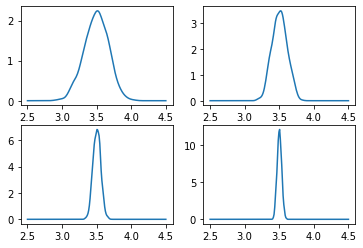

In [25]:
fig, axs = plt.subplots(2, 2)
axs = axs.ravel()
for i in range(0, len(n)):
    xs = np.linspace(2.5,4.5,200)
    density = stats.gaussian_kde(dfBetas.loc[:,i])
    axs[i].plot(xs, density(xs))


# Exercices

## 1. Class Sizes and Test Scores

A researcher wants to analyze the relationship between class size (measured by the student-teacher ratio) and the average test score. Therefore he measures both variables in 10

different classes and ends up with the following results.   
Class Size 	23 	19 	30 	22 	23 	29 	35 	36 	33 	25   
Test Score 	430 	430 	333 	410 	390 	377 	325 	310 	328 	375   

Instructions:

* Create the vectors cs (the class size) and ts (the test score), containing the observations above.

* Draw a scatterplot of the results using plot().


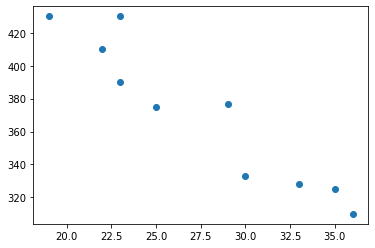

In [38]:
# create both vectors
cs = np.array([23, 19, 30, 22, 23, 29, 35, 36, 33, 25])
ts = np.array([430, 430, 333, 410, 390, 377, 325, 310, 328, 375])

# draw the scatterplot
plt.scatter(cs,ts)

## 2. Mean, Variance, Covariance and Correlation

The vectors cs and ts are available in the working environment (you can check this: type their names into the console and press enter).

Instructions:

* Compute the mean, the sample variance and the sample standard deviation of ts.

* Compute the covariance and the correlation coefficient for ts and cs.

In [39]:
print(f'ts\nMean: {np.mean(ts)}\nVariance: {np.var(ts)}\nS.D: {np.sqrt(np.var(ts))}')

ts
Mean: 370.8
Variance: 1802.56
S.D: 42.45656604107308


In [40]:
print(np.cov(ts,cs)[0,1])
print(np.corrcoef(ts,cs)[0,1])

-251.44444444444443
-0.9474424340334486


## 3. Simple Linear Regression

The vectors cs and ts are available in the working environment.

Instructions:

* The function lm() is part of the package AER. Attach the package using library().

* Use lm() to estimate the regression model $TestScorei=β0+β1STRi+ui$.

    Assign the result to mod.

* Obtain a statistical summary of the model.

In [41]:
cs_m = sm.add_constant(cs)

lm_ex3 = sm.OLS(ts, cs_m).fit()

In [42]:
lm_ex3.summary()

/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     70.16
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           3.13e-05
Time:                        21:51:46   Log-Likelihood:                -40.278
No. Observations:                  10   AIC:                             84.56
Df Residuals:                       8   BIC:                             85.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        567.4272     23.961     23.682      0.000     512.174     622.681
x1            -7.1501      0.854     -8.376      0.000      -9.119      -5.182
==============================================================================
Omnibus:                        0.814   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.524
Skew:                           0.493   Prob(JB):                        0.770
Kurtosis:                       2.469   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
cs

array([23, 19, 30, 22, 23, 29, 35, 36, 33, 25])

## 4. The Model Object

Let us see how an object of class lm is structured.

The vectors cs and ts as well as the model object mod from the previous exercise are available in your workspace.

Instructions:

* Use class() to learn about the class of the object mod.
* mod is an object of type list with named entries. Check this using the function is.list().
* See what information you can obtain from mod using names().
* Read out an arbitrary entry of the object mod using the $ operator.


In [44]:
lm_ex3.fittedvalues

array([402.97535545, 431.57567141, 352.92480253, 410.12543444,
       402.97535545, 360.07488152, 317.17440758, 310.02432859,
       331.47456556, 388.67519747])

In [48]:
import inspect
inspect.getmembers(lm_ex3)

[('HC0_se', array([16.22659617,  0.51417299])),
 ('HC1_se', array([18.14188604,  0.57486287])),
 ('HC2_se', array([17.82053588,  0.5663235 ])),
 ('HC3_se', array([19.59345768,  0.62494402])),
 ('_HCCM',
  <bound method RegressionResults._HCCM of <statsmodels.regression.linear_model.OLSResults object at 0x7f982e90dbe0>>),
 ('__class__', statsmodels.regression.linear_model.RegressionResultsWrapper),
 ('__delattr__',
  <method-wrapper '__delattr__' of RegressionResultsWrapper object at 0x7f982e9f8040>),
 ('__dict__',
  {'_results': <statsmodels.regression.linear_model.OLSResults at 0x7f982e90dbe0>,
   '__doc__': "\n    Results class for for an OLS model.\n\n    Parameters\n    ----------\n    model : RegressionModel\n        The regression model instance.\n    params : ndarray\n        The estimated parameters.\n    normalized_cov_params : ndarray\n        The normalized covariance parameters.\n    scale : float\n        The estimated scale of the residuals.\n    cov_type : str\n        T

## 5. Plotting the Regression Line

You are provided with the code for the scatterplot in script.R

Instructions:

* Add the regression line to the scatterplot from a few exercises before.

* The object mod is available in your working environment.


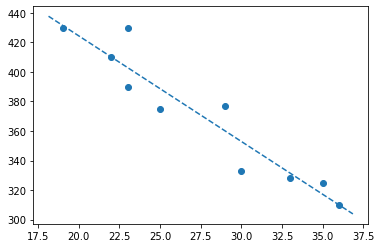

In [47]:
%matplotlib inline
plt.scatter(cs,ts)

abline(lm_ex3.params[1], lm_ex3.params[0])

plt.show()

## 6. Summary of a Model Object

Now read out and store some of the information that is contained in the output of summary().

Instructions:

* Assign the output of summary(mod) to the variable s.

* Check entry names of the object s.

* Create a new variable R2 and assign the R2 of the regression.

The object mod is available in your working environment.

In [51]:
R2 = lm_ex3.rsquared

print(R2)

0.8976471658072255


## 7. Estimated Coefficients

The function summary() also provides information on the statistical significance of the estimated coefficients.

Instructions:

* Extract the named 2×4 matrix with estimated coefficients, standard errors, t-statistics and corresponding p-values from the model summary s. Save this matrix in an object named coefs.

* The objects mod and s are available in your working environment.

In [63]:
coefs = lm_ex3.summary().tables[1]

coefs

,coef,std err,t,P>|t|,[0.025,0.975]
const,567.4272,23.961,23.682,0.000,512.174,622.681
x1,-7.1501,0.854,-8.376,0.000,-9.119,-5.182


## 8. Dropping the Intercept

So far, we have estimated regression models consisting of an intercept and a single regressor. In this exercise you will learn how to specify and how to estimate regression a model without intercept.

Note that excluding the intercept from a regression model might be a dodgy practice in some applications as this imposes the conditional expectation function of the dependent variable to be zero if the regressor is zero.

Instructions:

* Figure out how the formula argument must be specified for a regression of ts solely on cs, i.e., a regression without intercept. Google is your friend!

* Estimate the regression model without intercept and store the result in mod_ni.

The vectors cs, ts and the model object mod from previous exercises are available in the working environment.

In [64]:
lm_ex4 = sm.OLS(ts, cs).fit()

In [66]:
lm_ex4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              86.57
Date:                Mon, 23 Aug 2021   Prob (F-statistic):                    6.50e-06
Time:                        22:04:56   Log-Likelihood:                         -61.598
No. Observations:                  10   AIC:                                      125.2
Df Residuals:                       9   BIC:                                      125.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.6548      1.360      9.304      0.000       9.578      15.732
==============================================================================
Omnibus:                        2.138   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                0.854
Skew:                          -0.094   Prob(JB):                        0.652
Kurtosis:                       1.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 9. Regression Output: No Constant Case

In Exercise 8 you have estimated a model without intercept. The estimated regression function is

$\text { TestScore }_{i}=\underset{(1.36)}{12.65} \times S T R_{i}$

Instructions:

* Convince yourself that everything is as stated above: extract the coefficient matrix from the summary of mod_ni and store it in a variable named coef.

* The vectors cs, ts as well as the model object mod_ni from the previous exercise are available in your working environment.

In [67]:
coef = lm_ex4.params[0]

12.654778525193548

## 10. Regression Output: No Constant Case — Ctd.

In Exercises 8 and 9 you have dealt with a model without intercept. The estimated regression function was

$\text { TestScore }_{i}=\underset{(1.36)}{12.65} \times S T R_{i}$

The coefficient matrix coef from Exercise 9 contains the estimated coefficient on STR
, its standard error, the t-statistic of the significance test and the corresponding p-value.

Instructions:

* Print the contents of coef to the console.
  
* Convince yourself that the reported t-statistic is correct: use the entries of coef to compute the t-statistic and save it to t_stat.

The matrix coef from the previous exercise is available in your working environment.

In [72]:
t_stat = lm_ex4.params[0] / lm_ex4.bse[0]

t_stat

9.304097093872121

## 11. Two Regressions, One Plot

The two estimated regression models from the previous exercises are

$\text { TestScore }_{i}=\underset{(1.36)}{12.65} \times S T R_{i}$

and

ˆTestScorei=567.4272(23.96)−7.1501(0.85)×STRi.

You are provided with the code line plot(cs, ts) which creates a scatterplot of ts and cs. Note that this line must be executed before calling abline()! You may color the regression lines by using, e.g., col = “red” or col = “blue” as an additional argument to abline() for better distinguishability.

The vectors cs and ts as well as the list objects mod and mod_ni from previous exercises are available in your working environment.

Instructions:

Generate a scatterplot of ts and cs and add the estimated regression lines of mod and mod_ni.

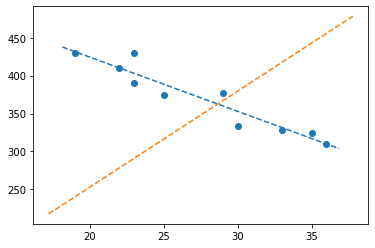

In [76]:
%matplotlib inline
plt.scatter(cs,ts)

abline(lm_ex3.params[1], lm_ex3.params[0])

abline(lm_ex4.params[0], 0)

plt.show()

## 12. TSS and SSR

If graphical inspection does not help, researchers resort to analytic techniques in order to detect if a model fits the data at hand good or better than another model.

Let us go back to the simple regression model including an intercept. The estimated regression line for mod was

ˆTestScorei=567.43−7.15×STRi,R2=0.8976,SER=15.19.

You can check this as mod and the vectors cs and ts are available in your working environment.

Instructions:

* Compute SSR , the sum of squared residuals, and save it to ssr.

* Compute TSS, the total sum of squares, and save it to tss.

In [86]:
ssr = np.sum(lm_ex3.resid**2)

ssr

1844.9712480252767

In [93]:
tss = (lm_ex3.nobs - 1) * stats.tvar(ts)

tss

18025.6

## 13. The R2 of a Regression Model

The R2 of the regression saved in mod is 0.8976. 
You can check this by executing summary(mod)$r.squared in the console below.

Remember the formula of R2: 

R2=ESS/TSS=1− ( SSR /TSS)

The objects mod, tss and ssr from the previous exercise are available in your working environment.

Instructions:

* Use ssr and tss to compute R2 manually. Round the result to four decimal places and save it to R2.
* Use the logical operator == to check whether your result matches the value mentioned above.

In [95]:
round(lm_ex3.rsquared, 4) == round(1 - (ssr / tss),4)

True

Got bored for the last two exercices.